<h1>DecisionTree</h1>

# Dự báo thời tiết với Decision Tree

Notebook này thực hiện các bước sau:
- Đọc và tiền xử lý dữ liệu từ file `weatherHCM_preprocessed.csv`
- Tách dữ liệu huấn luyện và kiểm tra
- Huấn luyện mô hình Decision Tree
- Đánh giá mô hình
- Dự báo thời tiết cho nhiều mẫu dữ liệu mới


## Bước 1: Đọc và tiền xử lý dữ liệu

Đọc file CSV (phân cách bởi tab) và tiến hành chọn các cột đặc trưng, chuyển đổi dữ liệu sang kiểu số và xử lý giá trị thiếu.


In [14]:
import pandas as pd

# Đọc file CSV
file_path = "weatherHCM_preprocessed.csv"  # Cập nhật đường dẫn nếu cần
df = pd.read_csv(file_path, sep="\t")

# Chọn các cột đặc trưng
feature_columns = [
    "Temp", 
    "Feels", 
    "Gust", 
    "Rain", 
    "Humidity", 
    "Cloud", 
    "Pressure", 
    "Wind Speed"
]
X = df[feature_columns].copy()

# Chuyển đổi các cột sang kiểu số và xử lý giá trị thiếu
X = X.apply(pd.to_numeric, errors="coerce")
X.fillna(X.mean(), inplace=True)

# Xử lý biến mục tiêu: Mã hóa cột "Weather"
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Weather"])

print("Dữ liệu đã được tiền xử lý thành công.")


Dữ liệu đã được tiền xử lý thành công.


## Bước 2: Tách dữ liệu huấn luyện và kiểm tra

Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra.


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print("Tách dữ liệu thành công: X_train.shape =", X_train.shape, ", X_test.shape =", X_test.shape)


Tách dữ liệu thành công: X_train.shape = (27980, 8) , X_test.shape = (6996, 8)


## Bước 3: Huấn luyện mô hình Decision Tree

Huấn luyện mô hình trên tập huấn luyện và đánh giá độ chính xác trên tập kiểm tra.


In [16]:
# train_model.py
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

# Đọc và tiền xử lý dữ liệu
file_path = "weatherHCM_preprocessed.csv"  # Cập nhật đường dẫn nếu cần
df = pd.read_csv(file_path, sep="\t")

feature_columns = [
    "Temp", "Feels", "Gust", "Rain", "Humidity", "Cloud", "Pressure", "Wind Speed"
]
X = df[feature_columns].copy()
X = X.apply(pd.to_numeric, errors="coerce")
X.fillna(X.mean(), inplace=True)

# Mã hóa biến mục tiêu "Weather"
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Weather"])

# Tách dữ liệu (có thể dùng toàn bộ để huấn luyện nếu cần)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Decision Tree (sử dụng tiêu chí entropy nếu muốn)
model = DecisionTreeClassifier(random_state=42, criterion='entropy')
model.fit(X_train, y_train)

# Đánh giá mô hình (tùy chọn)
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác trên tập kiểm tra: {accuracy:.2%}")
print("Thứ tự mã hóa của LabelEncoder:", label_encoder.classes_)

# Lưu mô hình và LabelEncoder vào file sử dụng pickle
with open("weather_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("Mô hình và LabelEncoder đã được lưu thành công.")


Độ chính xác trên tập kiểm tra: 86.11%
Thứ tự mã hóa của LabelEncoder: ['Clear' 'Cloudy' 'Mist' 'Overcast' 'Rain' 'Sunny']
Mô hình và LabelEncoder đã được lưu thành công.


## Cây Quyết Định

Độ chính xác trên tập kiểm tra: 85.26%
Thứ tự mã hóa của LabelEncoder: ['Clear' 'Cloudy' 'Mist' 'Overcast' 'Rain' 'Sunny']


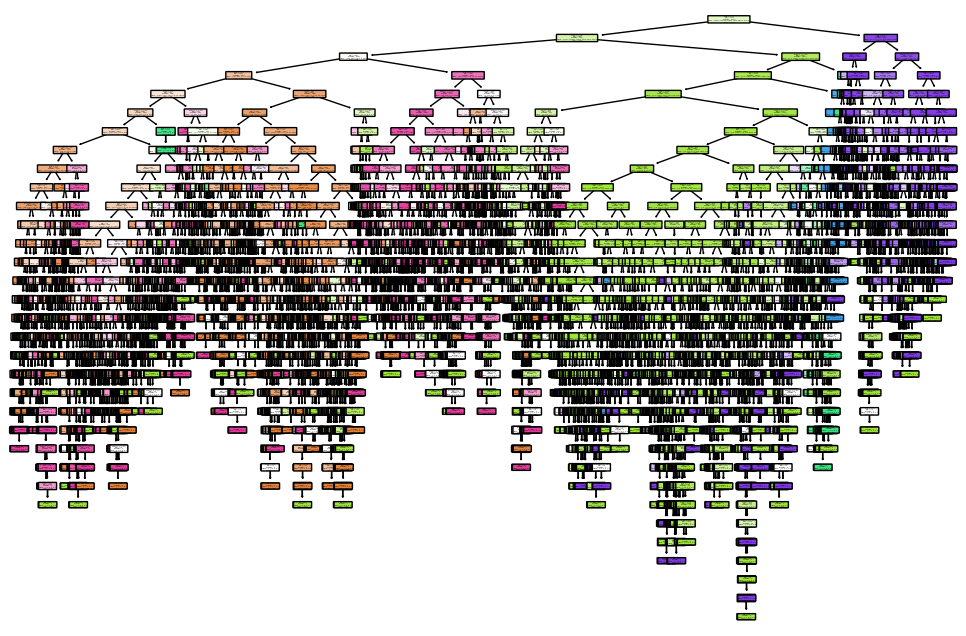

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Định nghĩa và huấn luyện mô hình
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác trên tập kiểm tra: {accuracy:.2%}")

# Hiển thị thứ tự mã hóa của các nhãn Weather
print("Thứ tự mã hóa của LabelEncoder:", label_encoder.classes_)

# Vẽ cây quyết định
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X_train.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()

## Bước 4: Dự báo cho dữ liệu mới
 
Tạo danh sách các mẫu dữ liệu mới và sử dụng mô hình đã huấn luyện để dự báo.


In [27]:
# Danh sách các mẫu dữ liệu mới để test
new_samples = [
    {"Temp": 30.0, "Feels": 34.0, "Gust": 5.0, "Rain": 0.0, "Humidity": 70.0, "Cloud": 50.0, "Pressure": 1008.0, "Wind Speed": 3.0},
    {"Temp": 25.0, "Feels": 27.0, "Gust": 2.0, "Rain": 1.0, "Humidity": 80.0, "Cloud": 90.0, "Pressure": 1012.0, "Wind Speed": 4.0},
    {"Temp": 35.0, "Feels": 38.0, "Gust": 8.0, "Rain": 0.0, "Humidity": 60.0, "Cloud": 20.0, "Pressure": 1005.0, "Wind Speed": 5.0},
    {"Temp": 28.0, "Feels": 30.0, "Gust": 3.0, "Rain": 2.0, "Humidity": 90.0, "Cloud": 85.0, "Pressure": 1015.0, "Wind Speed": 2.0}
]

# Chuyển danh sách mẫu mới thành DataFrame với các cột theo feature_columns
new_data_df = pd.DataFrame(new_samples, columns=feature_columns)

# Để tránh cảnh báo về feature names, chuyển DataFrame thành numpy array
y_new_pred = model.predict(new_data_df.to_numpy())

# Giải mã nhãn dự đoán thành tên thời tiết
weather_preds = label_encoder.inverse_transform(y_new_pred)

for i, pred in enumerate(weather_preds):
    print(f"Dữ liệu mới thứ {i+1}: Dự báo thời tiết -> {pred}")


Dữ liệu mới thứ 1: Dự báo thời tiết -> Mist
Dữ liệu mới thứ 2: Dự báo thời tiết -> Rain
Dữ liệu mới thứ 3: Dự báo thời tiết -> Mist
Dữ liệu mới thứ 4: Dự báo thời tiết -> Rain


C:\Users\trand\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
